## In this notebook, we are working on hybrid model

In [14]:
# Import libraries
import pandas as pd  # For data manipulation and analysis

import numpy as np  # For numerical computations and handling arrays

import matplotlib.pyplot as plt  # For data visualization with static, animated, or interactive plots

import seaborn as sns  # For advanced data visualization and statistical graphics

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# For evaluating classification model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression model performance

# For implementing logistic and linear regression models
from sklearn.linear_model import LogisticRegression, LinearRegression  

# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor  # For ensemble learning methods for classification and regression

from sklearn.tree import DecisionTreeRegressor  # For building decision tree models for regression

from sklearn.svm import SVC  # For implementing Support Vector Classifier for classification tasks

from textblob import TextBlob  # For simple text processing and sentiment analysis

from wordcloud import WordCloud  # For generating visual word clouds from text data

import nltk  # For natural language processing (NLP) tasks such as tokenization and text analysis

from nltk.corpus import stopwords  # For accessing common stop words used in text processing

# For Ignoring Warnings
import warnings  # For controlling the display of warning messages
warnings.filterwarnings("ignore")  # Suppresses warning messages for cleaner output

# For Saving model
import pickle
import joblib

### Run this cell if this notebook is ran from google colab and the data is stored in drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Reading Data from directory

data = pd.read_csv('Dataset/News_Stock_Price.csv')

print("Dataset is:\n")

print(data)

Dataset is:

            date                                                url  \
0     2022-10-08  https://www.livemint.com/market/stock-market-n...   
1     2022-10-08  https://www.zawya.com/en/markets/equities/wall...   
2     2022-10-08  https://www.goodisonnews.com/2022/10/08/stock-...   
3     2022-10-08  https://www.livemint.com/market/stock-market-n...   
4     2022-10-08  https://finance.yahoo.com/news/crypto-exchange...   
...          ...                                                ...   
4694  2021-10-09  https://www.fool.com/investing/2021/10/09/shou...   
4695  2021-10-09  https://www.fool.com/investing/2021/10/09/when...   
4696  2021-10-09  https://abcnews.go.com/Business/stocks-soar-hi...   
4697  2021-10-09  https://www.fool.com/investing/2021/10/09/this...   
4698  2021-10-09  https://www.fool.com/investing/2021/10/09/why-...   

                                              full_text  \
0     Have you read your account statements for the ...   
1     Wall Stree

### Converting to Datetime

In [3]:
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

### Calculating Sentiment Scores

In [4]:
# Perform sentiment analysis on the 'summary' column
data['sentiment'] = data['summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

### Dropping Missing Rows

In [5]:
# Drop rows with missing target values (for simplicity)
data.dropna(subset=['voo_close'], inplace=True)

# Shift closing prices for "next day" prediction
data['voo_close_shifted'] = data['voo_close'].shift(-1)
data.dropna(subset=['voo_close_shifted'], inplace=True)


### Classification Target: Define price movement

In [6]:
# Classification Target: Define price movement
data['price_movement'] = np.where(data['voo_close_shifted'] > data['voo_close'], 1, 0) # 1 = Up, 0 = Down


### Saving the data with newly created columns

In [7]:
data.to_csv("Dataset\Preprocessed_News_Stock_Price_Dataset.csv")

### Separating and defining inputs and outputs for the models

In [8]:
# Features and targets for classification and regression
X = data[['sentiment']]
y_class = data['price_movement']
y_reg = data['voo_close_shifted']

# Train-test split
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)


## Classification Models

### Model Training and Evaluation: Random Forest Classifier

### For Pastel cmap

In [9]:
# For Pastel Colors
from matplotlib.colors import LinearSegmentedColormap

pastel_cmap = LinearSegmentedColormap.from_list("pastel", ["#FFB3BA", "#B3CDE3", "#CCEBC5", "#DECBE4"])

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       715
           1       0.00      0.00      0.00        18

    accuracy                           0.94       733
   macro avg       0.49      0.48      0.48       733
weighted avg       0.95      0.94      0.95       733

Confusion Matrix:
 [[689  26]
 [ 18   0]]


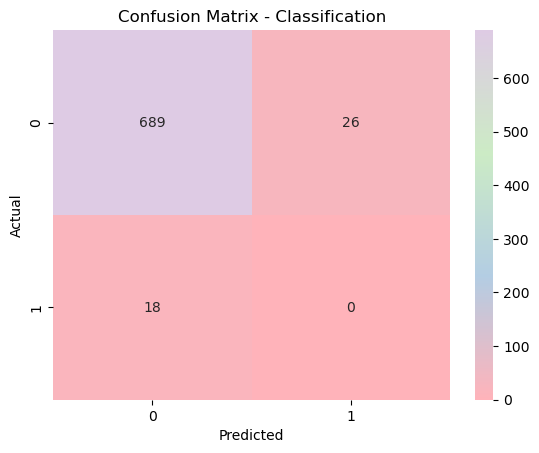

In [10]:
# Classification Model: Random Forest Classifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_class_train)
y_class_pred = clf_rf.predict(X_test)

# Classification Metrics
print("Random Forest Classifier Classification Report:\n", classification_report(y_class_test, y_class_pred))
print("Confusion Matrix:\n", confusion_matrix(y_class_test, y_class_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_class_test, y_class_pred), annot=True, fmt="d", cmap=pastel_cmap)
plt.title("Confusion Matrix - Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Model Training and Evaluation: Logistic Regression

In [11]:
# Initialize and train Logistic Regression model
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train, y_class_train)

# Predict and evaluate
y_class_pred_logreg = clf_logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_class_test, y_class_pred_logreg))
print(classification_report(y_class_test, y_class_pred_logreg))


Logistic Regression Accuracy: 0.975443383356071
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       715
           1       0.00      0.00      0.00        18

    accuracy                           0.98       733
   macro avg       0.49      0.50      0.49       733
weighted avg       0.95      0.98      0.96       733



### Model Training and Evaluation: Support Vector Machine

In [12]:
# Initialize and train SVM model
clf_svm = SVC(kernel='linear', probability=True)
clf_svm.fit(X_train, y_class_train)

# Predict and evaluate
y_class_pred_svm = clf_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_class_test, y_class_pred_svm))
print(classification_report(y_class_test, y_class_pred_svm))


SVM Accuracy: 0.975443383356071
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       715
           1       0.00      0.00      0.00        18

    accuracy                           0.98       733
   macro avg       0.49      0.50      0.49       733
weighted avg       0.95      0.98      0.96       733



### Model Training and Evaluation: K Neighbors Classifier

In [15]:
# Initialize and train KNN model
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_class_train)

# Predict and evaluate
y_class_pred_knn = clf_knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_class_test, y_class_pred_knn))
print(classification_report(y_class_test, y_class_pred_knn))


KNN Accuracy: 0.975443383356071
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       715
           1       0.00      0.00      0.00        18

    accuracy                           0.98       733
   macro avg       0.49      0.50      0.49       733
weighted avg       0.95      0.98      0.96       733



### Model Training and Evaluation: Gradient Boosting Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_class_train)

# Predict and evaluate
y_class_pred_gb = clf_gb.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_class_test, y_class_pred_gb))
print(classification_report(y_class_test, y_class_pred_gb))


Gradient Boosting Classifier Accuracy: 0.9672578444747613
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       715
           1       0.00      0.00      0.00        18

    accuracy                           0.97       733
   macro avg       0.49      0.50      0.49       733
weighted avg       0.95      0.97      0.96       733



## Classification Model Evaluation 

<br>

<table border="1">
  <tr>
    <th>Metric</th>
    <th>Random Forest Classifier</th>
    <th>Logistic Regression</th>
    <th>SVM</th>
    <th>KNN</th>
    <th>Gradient Boosting Classifier</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>0.94</td>
    <td>0.98</td>
    <td>0.98</td>
    <td>0.98</td>
    <td>0.97</td>
  </tr>
  <tr>
    <td>Precision (0)</td>
    <td>0.97</td>
    <td>0.98</td>
    <td>0.98</td>
    <td>0.98</td>
    <td>0.98</td>
  </tr>
  <tr>
    <td>Recall (0)</td>
    <td>0.96</td>
    <td>1.00</td>
    <td>1.00</td>
    <td>1.00</td>
    <td>0.99</td>
  </tr>
  <tr>
    <td>F1-Score (0)</td>
    <td>0.97</td>
    <td>0.99</td>
    <td>0.99</td>
    <td>0.99</td>
    <td>0.98</td>
  </tr>
  <tr>
    <td>Precision (1)</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
  </tr>
  <tr>
    <td>Recall (1)</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
  </tr>
  <tr>
    <td>F1-Score (1)</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
  </tr>
  <tr>
    <td>Macro Avg Precision</td>
    <td>0.49</td>
    <td>0.49</td>
    <td>0.49</td>
    <td>0.49</td>
    <td>0.49</td>
  </tr>
  <tr>
    <td>Macro Avg Recall</td>
    <td>0.48</td>
    <td>0.50</td>
    <td>0.50</td>
    <td>0.50</td>
    <td>0.50</td>
  </tr>
  <tr>
    <td>Macro Avg F1-Score</td>
    <td>0.48</td>
    <td>0.49</td>
    <td>0.49</td>
    <td>0.49</td>
    <td>0.49</td>
  </tr>
  <tr>
    <td>Weighted Avg Precision</td>
    <td>0.95</td>
    <td>0.95</td>
    <td>0.95</td>
    <td>0.95</td>
    <td>0.95</td>
  </tr>
  <tr>
    <td>Weighted Avg Recall</td>
    <td>0.94</td>
    <td>0.98</td>
    <td>0.98</td>
    <td>0.98</td>
    <td>0.97</td>
  </tr>
  <tr>
    <td>Weighted Avg F1-Score</td>
    <td>0.95</td>
    <td>0.96</td>
    <td>0.96</td>
    <td>0.96</td>
    <td>0.96</td>
  </tr>
</table>

### Since logistic regression is giving the most accuracy we will use it

In [56]:
# Save the model to a .pkl file
with open('Models/Classification/Logistic_Regression_Model.pkl', 'wb') as file:
    pickle.dump(clf_logreg, file)

# Save the model using joblib
joblib.dump(clf_logreg, 'Models/Classification/Logistic_Regression_Model.joblib')

['Models/Classification/Logistic_Regression_Model.joblib']

## Regression Models

### Model Training and Evaluation: Random Forest Regressor

Random Forest Regressor
Regression RMSE: 33.69991473327346
Regression R-Squared: -0.35036759335407974


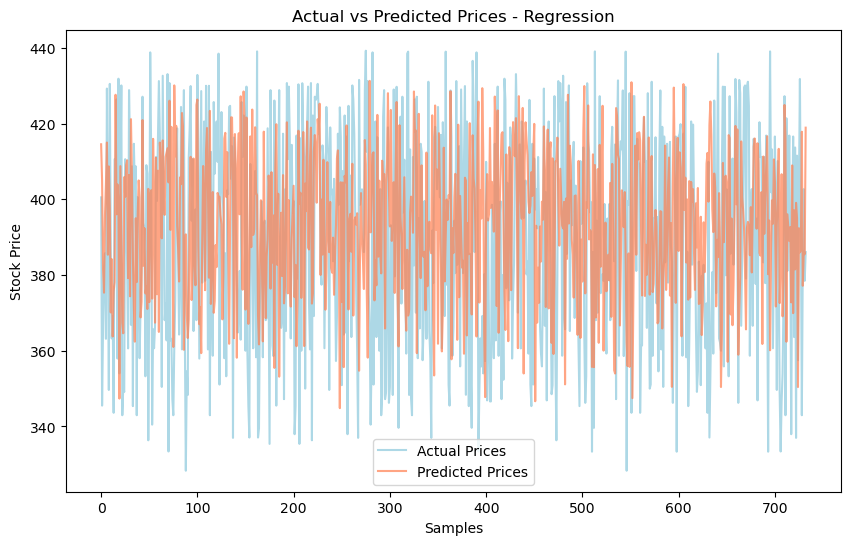

In [57]:
# Regression Model: Random Forest Regressor
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(X_train, y_reg_train)
y_reg_pred = reg_rf.predict(X_test)

# Regression Metrics
rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
r2 = r2_score(y_reg_test, y_reg_pred)
print("Random Forest Regressor")
print(f"Regression RMSE: {rmse}")
print(f"Regression R-Squared: {r2}")

# Plot Actual vs Predicted for Regression
plt.figure(figsize=(10, 6))
plt.plot(y_reg_test.values, label='Actual Prices', color='lightblue')
plt.plot(y_reg_pred, label='Predicted Prices', color='coral', alpha=0.7)
plt.title("Actual vs Predicted Prices - Regression")
plt.xlabel("Samples")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


### Model Training and Evaluation: Linear Regression model

In [19]:
# We have features in a variable called 'X' and target in 'y_reg'
# Split the data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42) # Split data

# Initialize and train Linear Regression model
reg_lin = LinearRegression()
reg_lin.fit(X_reg_train, y_reg_train)

# Predict and evaluate
y_reg_pred_lin = reg_lin.predict(X_reg_test)
print("Linear Regression RMSE:", mean_squared_error(y_reg_test, y_reg_pred_lin, squared=False))
print("Linear Regression R^2:", r2_score(y_reg_test, y_reg_pred_lin))

Linear Regression RMSE: 29.13038055497807
Linear Regression R^2: -0.008989668734918022


### Model Training and Evaluation: Support Vector Regressor

In [20]:
from sklearn.svm import SVR

# Initialize and train SVR model
reg_svr = SVR(kernel='rbf')
reg_svr.fit(X_reg_train, y_reg_train)

# Predict and evaluate
y_reg_pred_svr = reg_svr.predict(X_reg_test)
print("Support Vector Regression RMSE:", mean_squared_error(y_reg_test, y_reg_pred_svr, squared=False))
print("Support Vector Regression R^2:", r2_score(y_reg_test, y_reg_pred_svr))


Support Vector Regression RMSE: 29.617640977509115
Support Vector Regression R^2: -0.04302647367865409


### Model Training and Evaluation: Decision Tree Regressor

In [23]:
# Initialize and train Decision Tree Regressor
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_reg_train, y_reg_train)

# Predict and evaluate
y_reg_pred_tree = reg_tree.predict(X_reg_test)
print("Decision Tree Regressor RMSE:", mean_squared_error(y_reg_test, y_reg_pred_tree, squared=False))
print("Decision Tree Regressor R^2:", r2_score(y_reg_test, y_reg_pred_tree))


Decision Tree Regressor RMSE: 38.76171632135834
Decision Tree Regressor R^2: -0.7864892229095564


### Model Training and Evaluation: Gradient Boosting Regressor

In [26]:
# Initialize and train Gradient Boosting Regressor
reg_gb = GradientBoostingRegressor()
reg_gb.fit(X_reg_train, y_reg_train)

# Predict and evaluate
y_reg_pred_gb = reg_gb.predict(X_reg_test)
print("Gradient Boosting Regressor RMSE:", mean_squared_error(y_reg_test, y_reg_pred_gb, squared=False))
print("Gradient Boosting Regressor R^2:", r2_score(y_reg_test, y_reg_pred_gb))


Gradient Boosting Regressor RMSE: 29.346775197308315
Gradient Boosting Regressor R^2: -0.024035879737745125


## Regression Model Evaluation

<br>

<table border="1">
  <tr>
    <th>Model</th>
    <th>RMSE</th>
    <th>R-Squared</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Random Forest Regressor</td>
    <td>33.70</td>
    <td>-0.35</td>
    <td>An ensemble learning method using multiple decision trees to improve prediction accuracy.</td>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>29.13</td>
    <td>-0.01</td>
    <td>A statistical model that assumes a linear relationship between input variables and the target variable.</td>
  </tr>
  <tr>
    <td>Support Vector Regression</td>
    <td>29.62</td>
    <td>-0.04</td>
    <td>A regression technique based on Support Vector Machines (SVM), which tries to fit the best line within a margin of tolerance.</td>
  </tr>
  <tr>
    <td>Decision Tree Regressor</td>
    <td>38.76</td>
    <td>-0.79</td>
    <td>A non-linear regression model that splits data into subsets using feature-based decision rules.</td>
  </tr>
  <tr>
    <td>Gradient Boosting Regressor</td>
    <td>29.35</td>
    <td>-0.02</td>
    <td>A boosting technique that builds models sequentially, each correcting the errors of the previous one.</td>
  </tr>
</table>


### Since Gradient Boosting regression is giving the most accuracy we will use it

In [58]:
# Save the model to a .pkl file
with open('Models/Regression/Gradient_Boosting_Regressor_Model.pkl', 'wb') as file:
    pickle.dump(reg_gb, file)

# Save the model using joblib
joblib.dump(reg_gb, 'Models/Regression/Gradient_Boosting_Regressor_Model.joblib')

['Models/Regression/Gradient_Boosting_Regressor_Model.joblib']

## Data Visualization

### Residual Plot for Regression

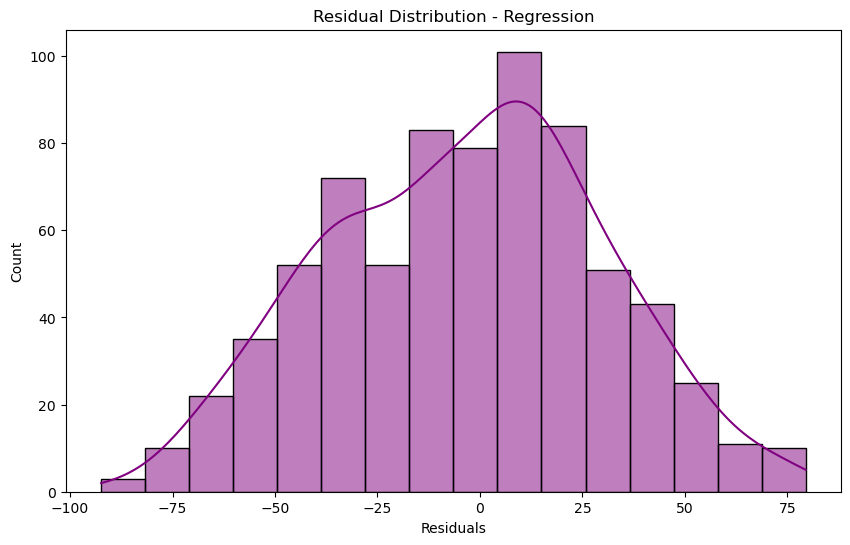

In [27]:
# Residual Plot for Regression
residuals = y_reg_test.values - y_reg_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Residual Distribution - Regression")
plt.xlabel("Residuals")
plt.show()


### Plot Sentiment Distribution

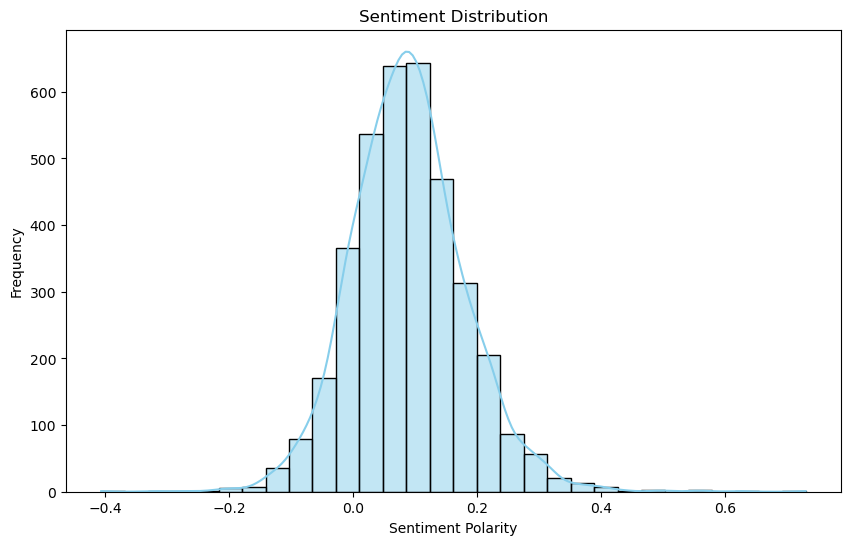

In [28]:
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


### Plot sentiment over time

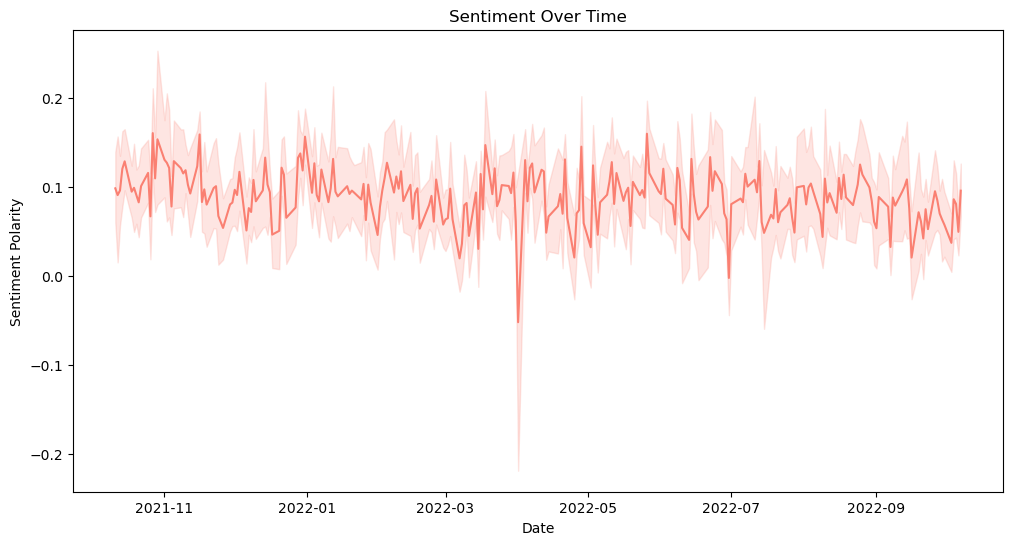

In [29]:
# Plot sentiment over time
plt.figure(figsize=(12, 6))
data_sorted = data.sort_values(by='date')
sns.lineplot(x='date', y='sentiment', data=data_sorted, color='salmon')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.show()


### Confusion Matrix for Test and Predicted Class

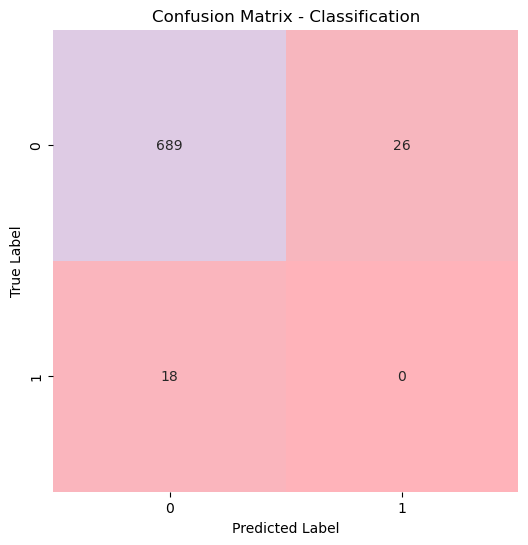

In [31]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_class_test, y_class_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=pastel_cmap, cbar=False)
plt.title("Confusion Matrix - Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### ROC Curve for Test and Probablities for Posititve Predicted Class

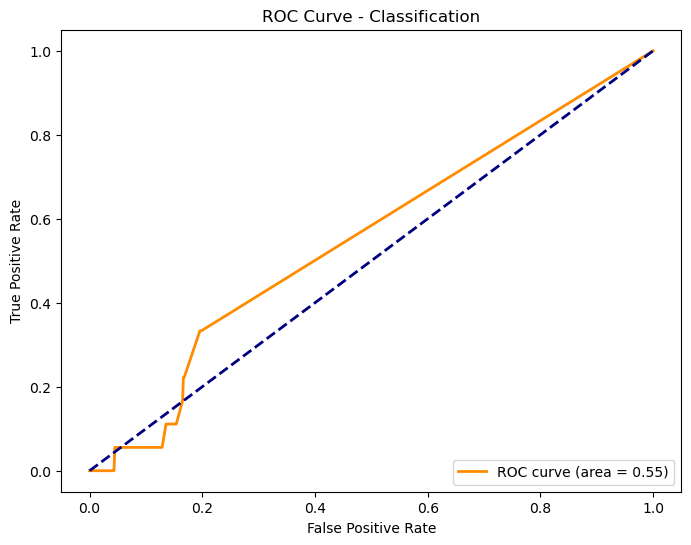

In [32]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
y_class_prob = clf_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_class_test, y_class_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Classification')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix for Test and Predicted for regression

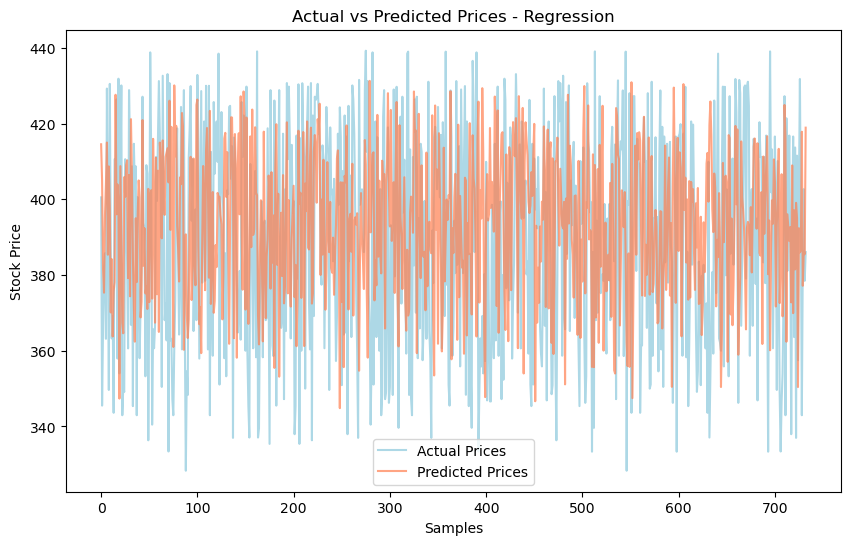

In [33]:
# Plot Actual vs Predicted for Regression
plt.figure(figsize=(10, 6))
plt.plot(y_reg_test.values, label='Actual Prices', color='lightblue')
plt.plot(y_reg_pred, label='Predicted Prices', color='coral', alpha=0.7)
plt.title("Actual vs Predicted Prices - Regression")
plt.xlabel("Samples")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


### Feature Importance for Random Forest Regressor (or Classifier)

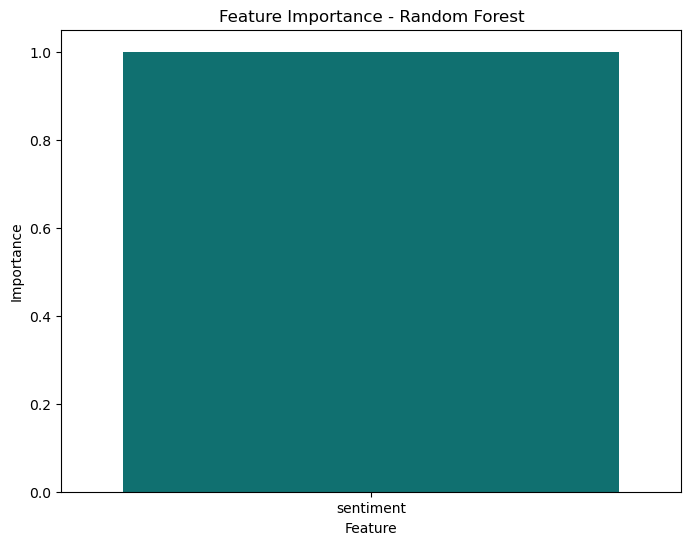

In [34]:
# Feature Importance for Random Forest Regressor (or Classifier)
feature_importances = reg_rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns, y=feature_importances, color="teal")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


### Plot box plot for sentiment by price movement

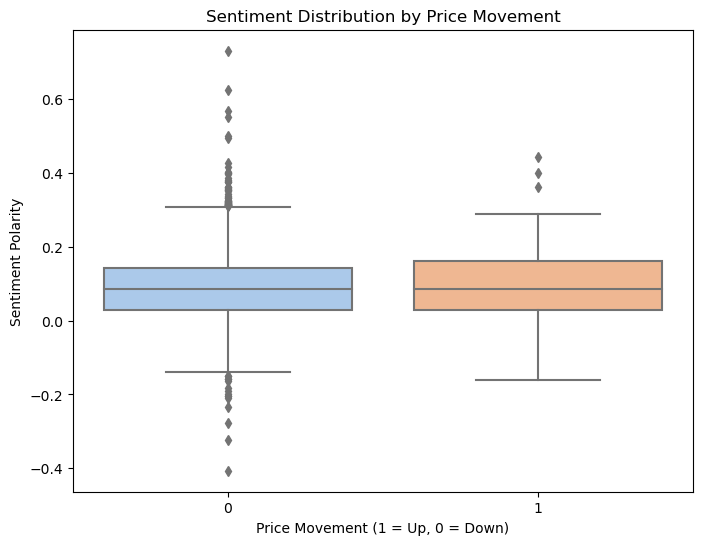

In [35]:
# Plot box plot for sentiment by price movement
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_movement', y='sentiment', data=data, palette="pastel")
plt.title('Sentiment Distribution by Price Movement')
plt.xlabel('Price Movement (1 = Up, 0 = Down)')
plt.ylabel('Sentiment Polarity')
plt.show()


### Plot daily closing price trend

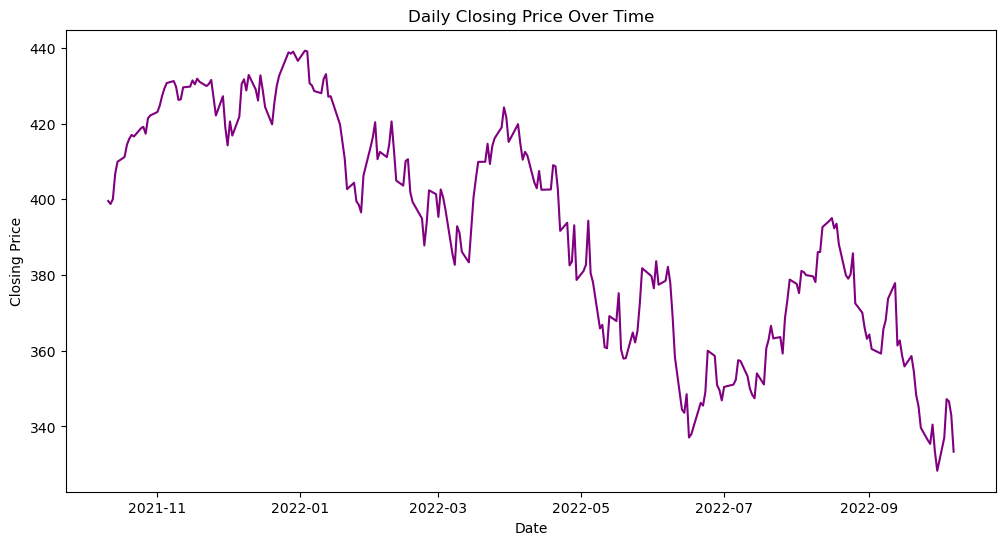

In [36]:
# Plot daily closing price trend
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['date'], data_sorted['voo_close'], color='purple')
plt.title('Daily Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


### Calculate 30-day moving average and Plotting

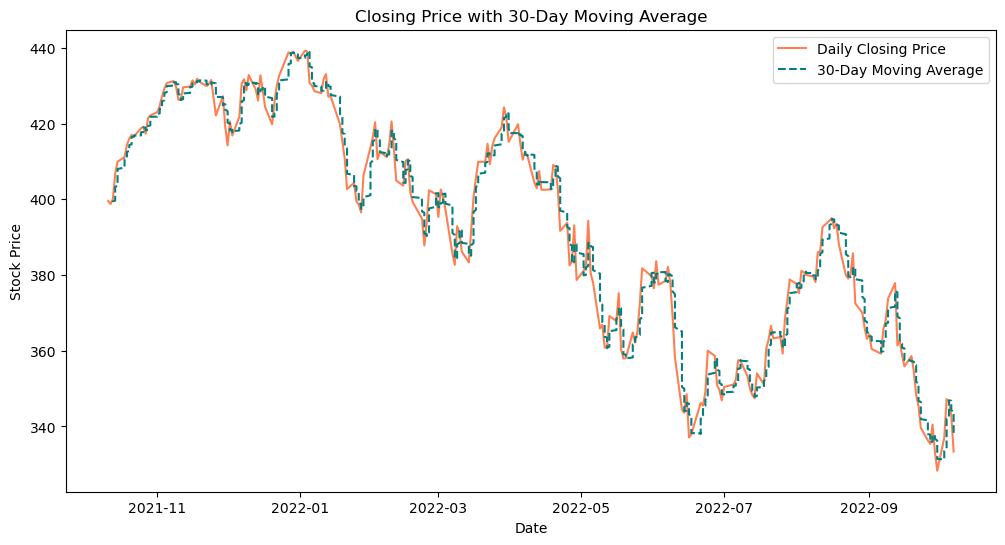

In [38]:
# Calculate 30-day moving average
data_sorted['30_day_MA'] = data_sorted['voo_close'].rolling(window=30).mean()

# Plot closing price with moving average
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['date'], data_sorted['voo_close'], label='Daily Closing Price', color='coral')
plt.plot(data_sorted['date'], data_sorted['30_day_MA'], label='30-Day Moving Average', color='teal', linestyle='--')
plt.title('Closing Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


### Feature Correlation Heat Map

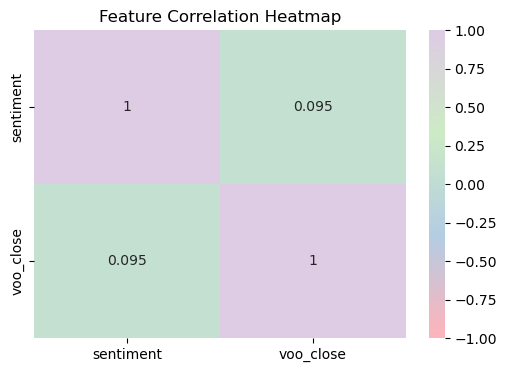

In [39]:
# Compute correlation matrix
correlation_matrix = data[['sentiment', 'voo_close']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap=pastel_cmap, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


### Creating a Pair Plot

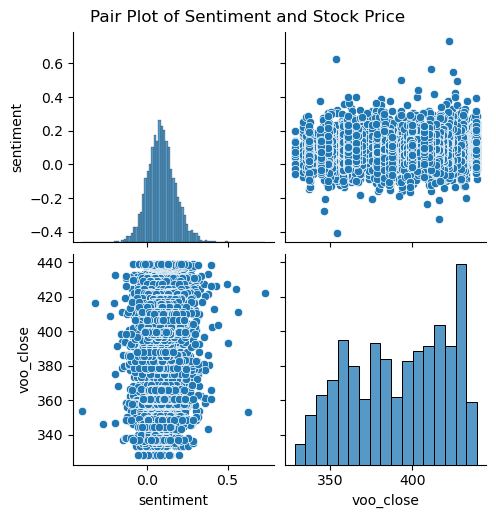

In [40]:
# Create pair plot
sns.pairplot(data[['sentiment', 'voo_close']])
plt.suptitle("Pair Plot of Sentiment and Stock Price", y=1.02)
plt.show()


### Creating a sentiment Plot

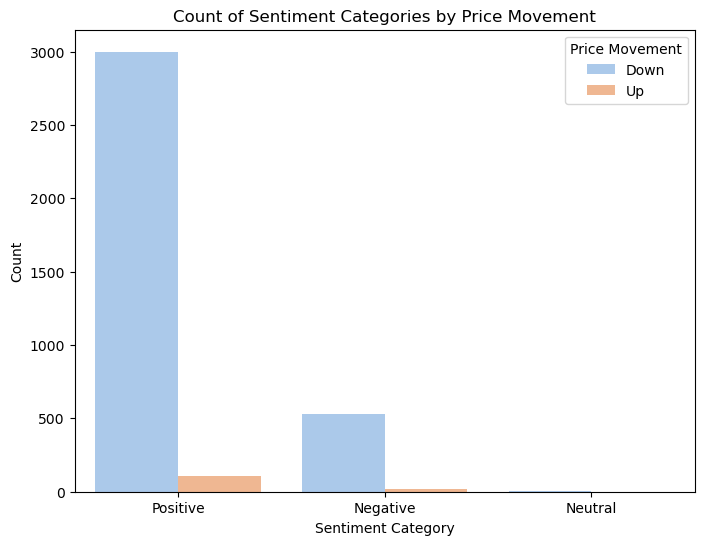

In [17]:
# Categorize sentiment
data['sentiment_category'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot count of sentiment categories by price movement
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', hue='price_movement', data=data, palette='pastel')
plt.title("Count of Sentiment Categories by Price Movement")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.legend(title="Price Movement", labels=["Down", "Up"])
plt.show()


### Creating a sentiment Category Plot

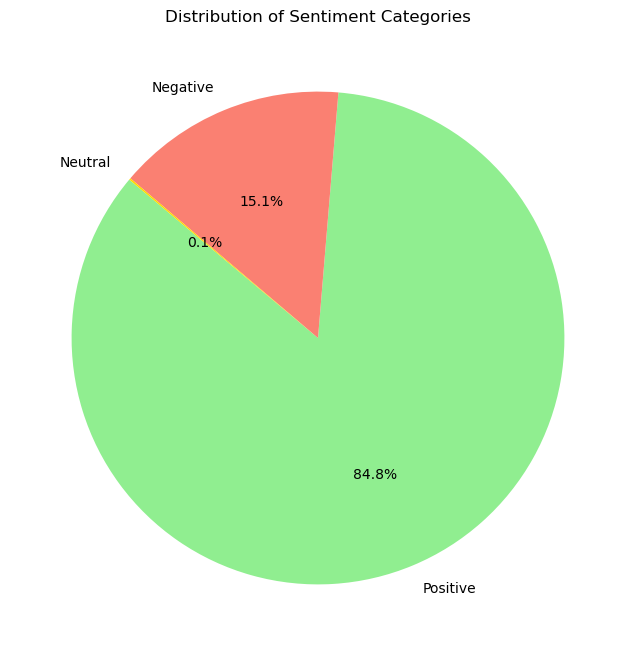

In [42]:
# Calculate sentiment category counts
sentiment_counts = data['sentiment_category'].value_counts()

# Plot pie chart of sentiment categories
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon', 'gold'])
plt.title("Distribution of Sentiment Categories")
plt.show()


### Plot bar chart of price movement counts

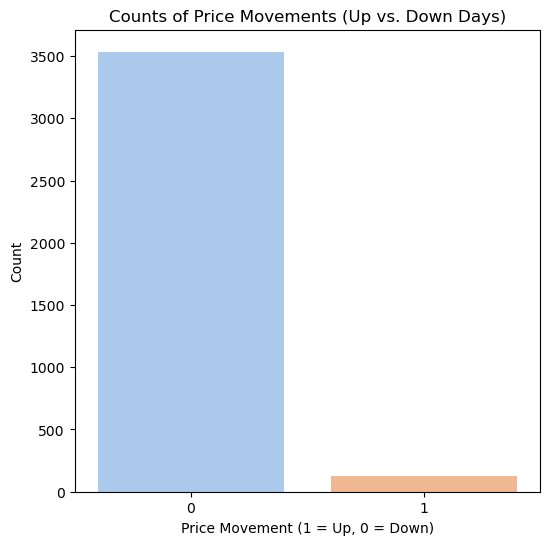

In [43]:
# Plot bar chart of price movement counts
plt.figure(figsize=(6, 6))
sns.countplot(x='price_movement', data=data, palette="pastel")
plt.title("Counts of Price Movements (Up vs. Down Days)")
plt.xlabel("Price Movement (1 = Up, 0 = Down)")
plt.ylabel("Count")
plt.show()


### Violin plot for sentiment distribution by price movement

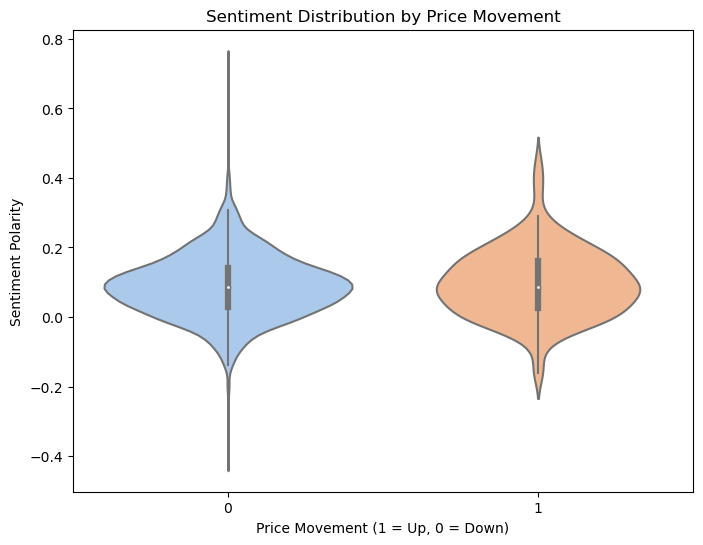

In [44]:
# Violin plot for sentiment distribution by price movement
plt.figure(figsize=(8, 6))
sns.violinplot(x='price_movement', y='sentiment', data=data, palette="pastel")
plt.title("Sentiment Distribution by Price Movement")
plt.xlabel("Price Movement (1 = Up, 0 = Down)")
plt.ylabel("Sentiment Polarity")
plt.show()


### Scatter plot of sentiment vs. closing price

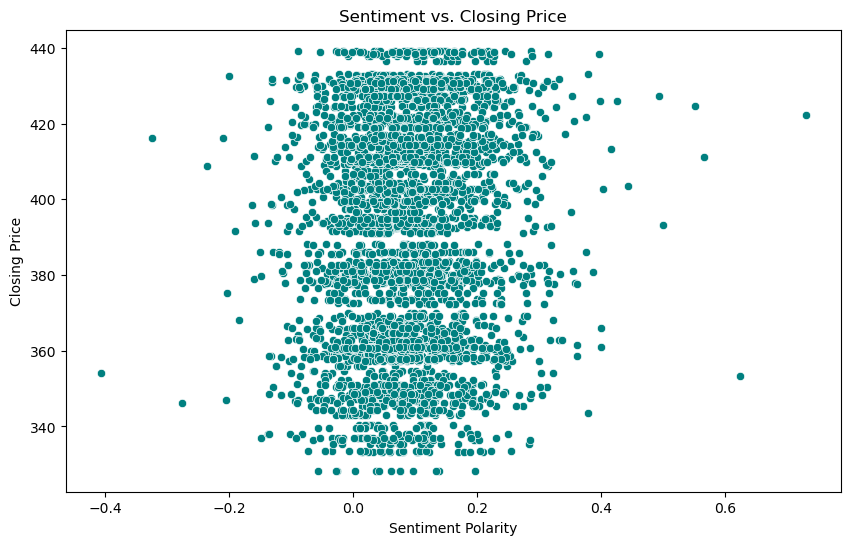

In [45]:
# Scatter plot of sentiment vs. closing price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='voo_close', data=data, color="teal")
plt.title("Sentiment vs. Closing Price")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Closing Price")
plt.show()


### KDE plot for sentiment scores

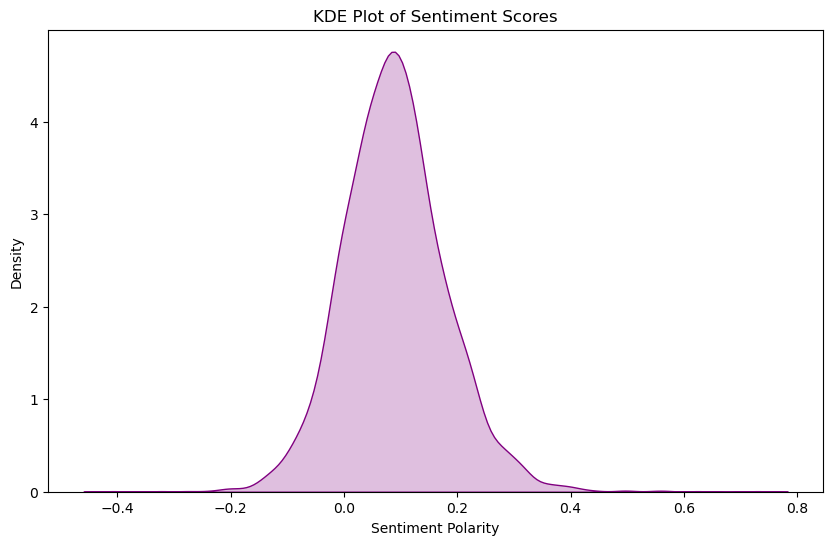

In [46]:
# KDE plot for sentiment scores
plt.figure(figsize=(10, 6))
sns.kdeplot(data['sentiment'], shade=True, color="purple")
plt.title("KDE Plot of Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Density")
plt.show()


### Joint plot of sentiment and stock price

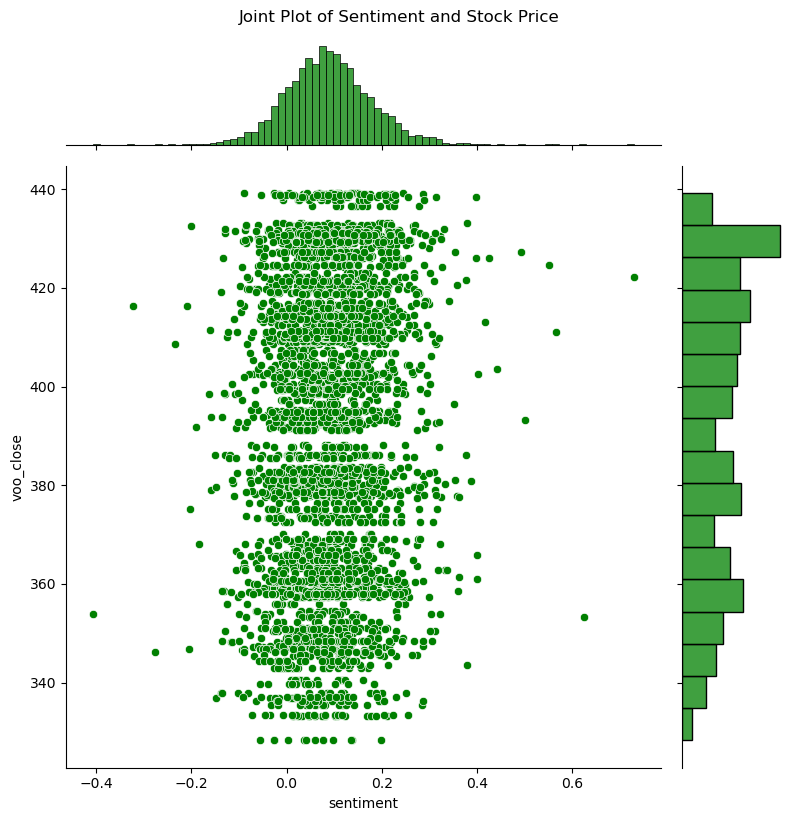

In [47]:
# Joint plot of sentiment and stock price
sns.jointplot(x='sentiment', y='voo_close', data=data, kind="scatter", color="green", height=8)
plt.suptitle("Joint Plot of Sentiment and Stock Price", y=1.02)
plt.show()


### Plot both sentiment and stock price over time

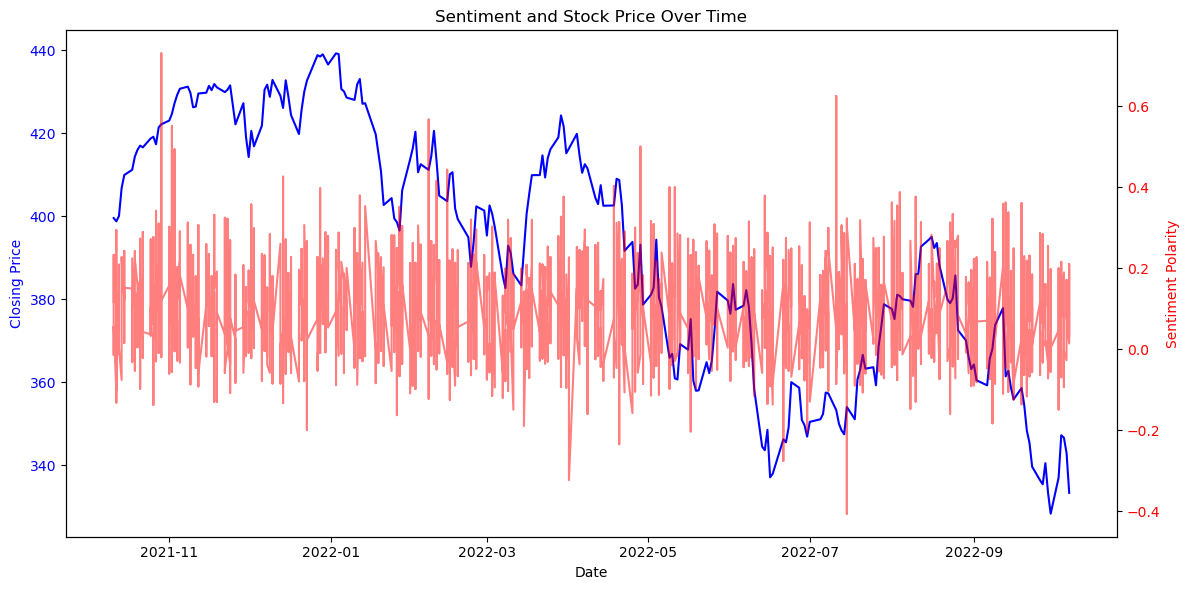

In [48]:
# Plot both sentiment and stock price over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stock price on primary y-axis
ax1.plot(data_sorted['date'], data_sorted['voo_close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Sentiment on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(data_sorted['date'], data_sorted['sentiment'], color='red', label='Sentiment', alpha=0.5)
ax2.set_ylabel('Sentiment Polarity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Sentiment and Stock Price Over Time')
fig.tight_layout()
plt.show()


### Plotting Wordcloud of words in text summary column

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


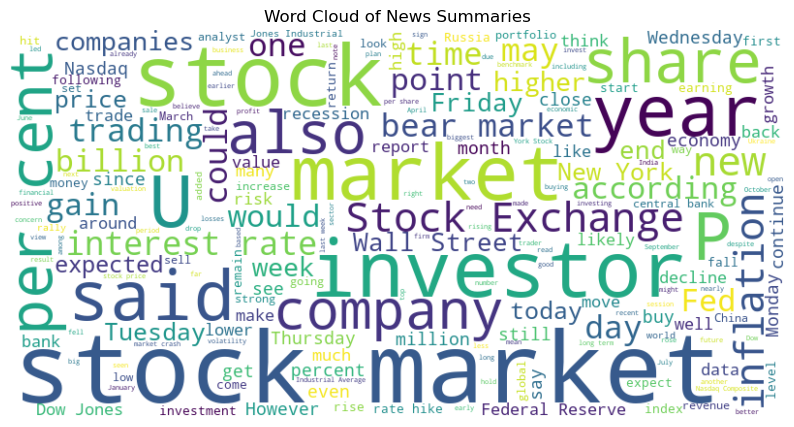

In [51]:
# Download the 'stopwords' dataset
nltk.download('stopwords') # download stopwords

# Combine all text data from the 'summary' column
text_data = " ".join(summary for summary in data['summary'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text_data)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of News Summaries")
plt.show()